##  Práctica: Predicción del precio de automóviles con Regresión Lineal Múltiple

###  Contexto

Una empresa automovilística china, **Geely Auto**, desea establecerse en el mercado estadounidense. Para ello, necesita **comprender qué factores influyen en el precio de los coches**. Tu tarea será construir un modelo predictivo con **Python y scikit-learn** que estime el precio de un automóvil a partir de sus características técnicas.

El conjunto de datos `CarPrice_Assignment.csv` contiene información de 205 modelos de coches vendidos en EE. UU., con variables como el tipo de combustible, tamaño del motor, peso, potencia, número de puertas, entre otros.

---

###  Objetivos de aprendizaje

* Aplicar el flujo completo de un **proyecto de Machine Learning supervisado**.
* Limpiar, analizar y preparar datos para su uso en un modelo predictivo.
* Entrenar y evaluar un modelo de **regresión lineal múltiple**.
* Interpretar los coeficientes y evaluar el rendimiento del modelo.
* Representar gráficamente los resultados y comunicar conclusiones.

---

###  Conocimientos previos

* Python y bibliotecas: `pandas`, `numpy`, `matplotlib`, `seaborn`, `sklearn`.
* Conceptos básicos de regresión lineal y normalización de variables.




---

###  Desarrollo paso a paso

#### **Paso 1: Cargar y explorar los datos**

In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("./dataset/CarPrice_Assignment.csv")
nan_values = df.isna().sum()
print(nan_values) # 0
df

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


* Comprueba número de filas y columnas.
* Identifica valores nulos o erróneos.
* Observa qué columnas podrían ser **variables categóricas** y cuáles **numéricas**.


#### **Paso 2: Limpieza de datos**

1. Extrae el nombre de la compañía de `CarName`.
2. Corrige errores ortográficos comunes (`vokswagen`, `toyouta`, etc.).
3. Elimina duplicados, si los hubiera.
4. Convierte todas las cadenas de texto a minúsculas.

In [113]:
df["company"] = df["CarName"].str.rsplit().str[0] # Nos quedamos solo con el nombre de la marca
# Pasamos el nombre de la compañía a minúsculas y corregimos los errores
df["company"] = df["company"].str.lower().str.replace("alfa-romero", "alfa-romeo").str.replace("maxda", "mazda").str.replace("porcshe", "porsche").str.replace("toyouta", "toyota").str.replace("vw", "volkswagen").str.replace("vokswagen", "volkswagen").str.replace("mercury", "ford")
for i in df.select_dtypes(include=["object", "string"]).columns:
    df[i] = df[i].str.lower()
nums = ["one", "two", "three", "four", "five", "six", "seven", "eight", "nine", "ten", "eleven", "twelve", "thirteen", "fourteen", "fifteen", "sixteen"]
for i in nums:
    df.loc[df["cylindernumber"] == i, "cylindernumber"] = nums.index(i) + 1
df["cylindernumber"] = df["cylindernumber"].astype(int)
for i in nums:
    df.loc[df["doornumber"] == i, "doornumber"] = nums.index(i) + 1
df["doornumber"] = df["doornumber"].astype(int)
df.drop_duplicates() # No hay duplicados

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,company
0,1,3,alfa-romero giulia,gas,std,2,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romeo
1,2,3,alfa-romero stelvio,gas,std,2,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romeo
2,3,1,alfa-romero quadrifoglio,gas,std,2,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romeo
3,4,2,audi 100 ls,gas,std,4,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,audi 100ls,gas,std,4,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,4,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0,volvo
201,202,-1,volvo 144ea,gas,turbo,4,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0,volvo
202,203,-1,volvo 244dl,gas,std,4,sedan,rwd,front,109.1,...,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0,volvo
203,204,-1,volvo 246,diesel,turbo,4,sedan,rwd,front,109.1,...,idi,3.01,3.40,23.0,106,4800,26,27,22470.0,volvo


#### **Paso 3: Análisis exploratorio**

* Visualiza la distribución de los precios.
* Muestra histogramas y diagramas de caja de las variables principales:

  * `fueltype`, `carbody`, `drivewheel`, `enginetype`
  * `horsepower`, `enginesize`, `curbweight`, `carwidth`
* Calcula la **matriz de correlación** y representa el **heatmap**.

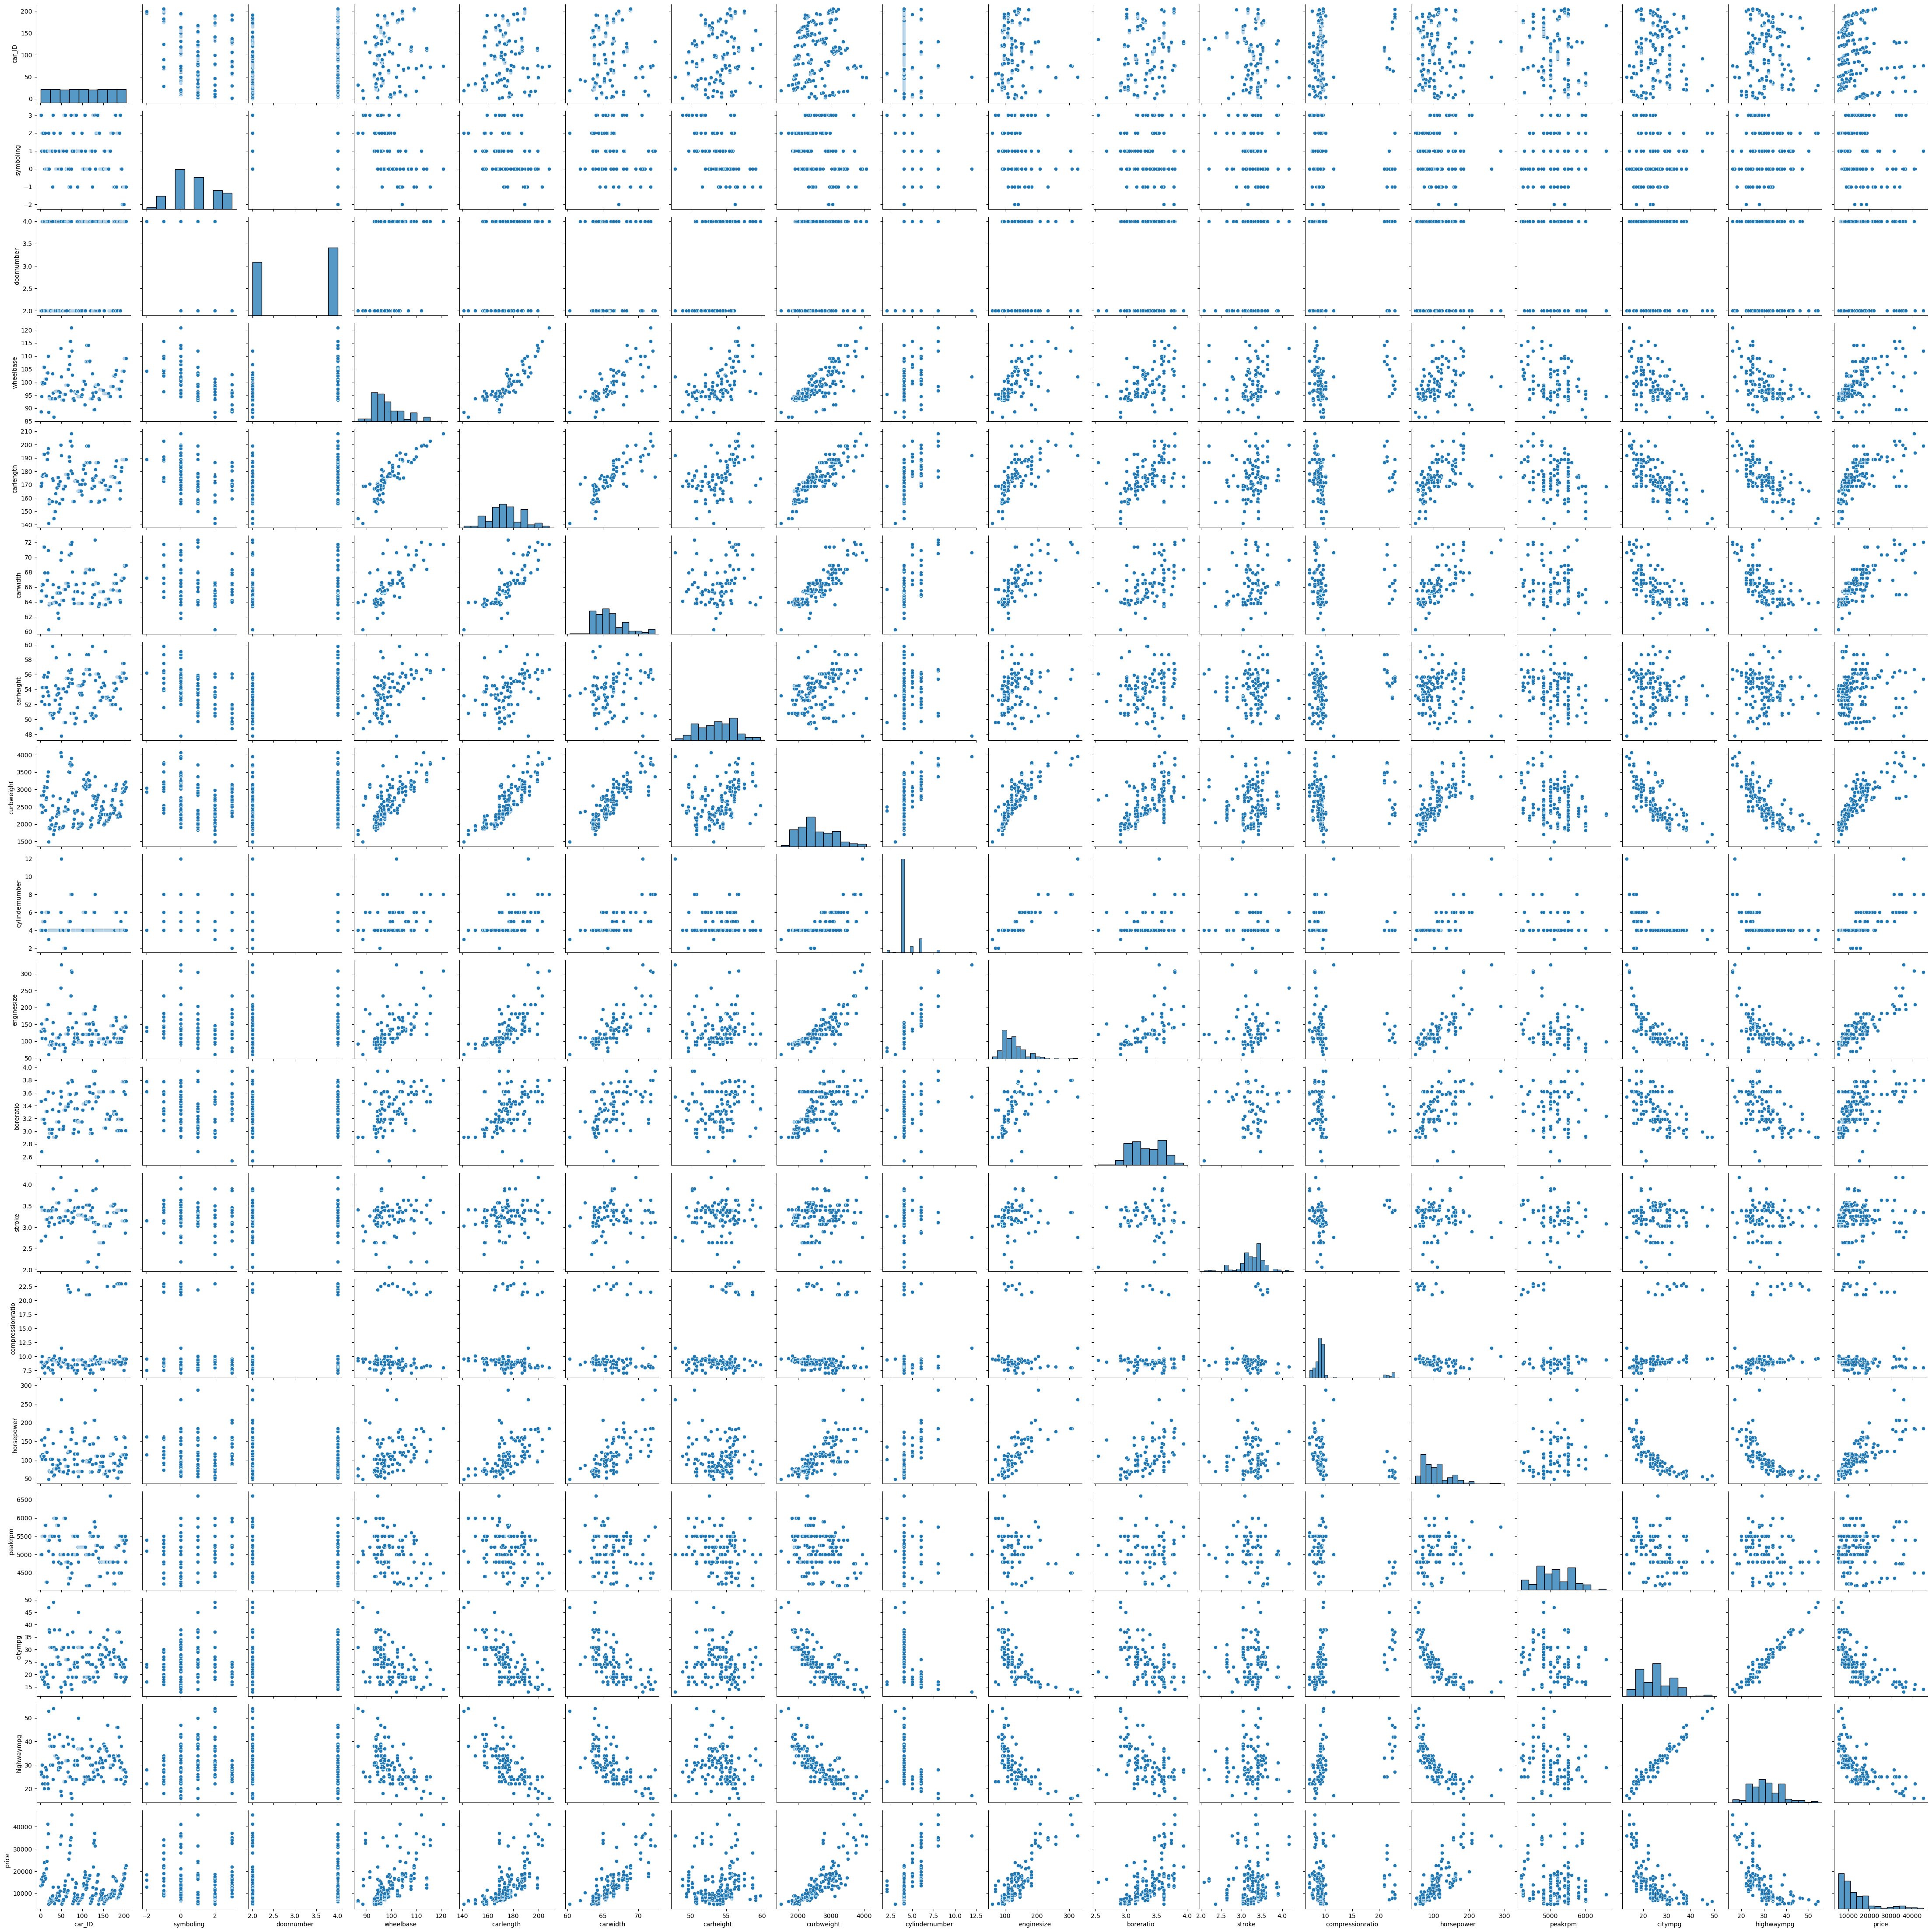

In [114]:
sns.pairplot(df)

In [115]:
df.corr(numeric_only=True)

,car_ID,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,1.000000,-0.151621,0.190352,0.129729,0.170636,0.052387,0.255960,0.071962,-0.094493,-0.033930,0.260064,-0.160824,0.150276,-0.015006,-0.203789,0.015940,0.011255,-0.109093
symboling,-0.151621,1.000000,-0.664073,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.113129,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
doornumber,0.190352,-0.664073,1.000000,0.447357,0.398568,0.207168,0.552208,0.197379,-0.016009,0.020742,0.119258,-0.011082,0.177888,-0.126947,-0.247668,-0.012417,-0.036330,0.031835
wheelbase,0.129729,-0.531954,0.447357,1.000000,0.874587,0.795144,0.589435,0.776386,0.339507,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.170636,-0.357612,0.398568,0.874587,1.000000,0.841118,0.491029,0.877728,0.430672,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.052387,-0.232919,0.207168,0.795144,0.841118,1.000000,0.279210,0.867032,0.545007,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.255960,-0.541038,0.552208,0.589435,0.491029,0.279210,1.000000,0.295572,-0.013995,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.071962,-0.227691,0.197379,0.776386,0.877728,0.867032,0.295572,1.000000,0.609727,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
cylindernumber,-0.094493,-0.113129,-0.016009,0.339507,0.430672,0.545007,-0.013995,0.609727,1.000000,0.846031,0.231399,0.008210,-0.020002,0.692016,-0.124172,-0.445837,-0.466666,0.718305
enginesize,-0.033930,-0.105790,0.020742,0.569329,0.683360,0.735433,0.067149,0.850594,0.846031,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145


Campos mas irrelevantes:
- car_id: irrelevante a la hora de entrenar el modelo
- symboling: no le hemos encontrado una utilidad
- doornumber: los gráficos muestran que a la hora de determinar el precio es irrelevante
- stroke: distancia que recorre el piston
- compressionratio: depende de si el coche utiliza diesel o gasolina
- peakrpm: depende de si el coche utiliza diesel o gasolina

In [116]:
df = df.drop(columns=["car_ID", "CarName", "symboling", "doornumber", "stroke", "compressionratio", "peakrpm"])

#### **Paso 4: Generar nuevas variables**

* Crea una variable `fueleconomy = 0.55 * citympg + 0.45 * highwaympg`
* Agrupa las compañías por precio medio y clasifícalas como:

  * `Budget` (menos de 10 000 $)
  * `Medium` (10 000 – 20 000 $)
  * `Highend` (más de 20 000 $)


In [117]:

df["fueleconomy"] = 0.55 * df["citympg"] + 0.45 * df["highwaympg"]
df = df.drop(columns=["citympg", "highwaympg"])
# No agrupamos las marcas ya que dan mucha información sobre otros aspectos del coche que no vienen reflejados en el dataset, como sistemas de seguridad o confort

#### **Paso 5: Preparar datos para el modelo**

1. Selecciona las variables más significativas (numéricas + categóricas).
2. Genera **variables dummy** con `pd.get_dummies()` (drop_first=True).
3. Divide en **X** (predictoras) e **y** (precio).
4. Realiza un **train-test split** (70 % – 30 %).
5. Aplica **normalización Min-Max o Z-score** sobre las variables numéricas.


In [118]:
df = pd.get_dummies(df, columns=["fueltype", "aspiration", "carbody", "drivewheel", "enginelocation", "enginetype", "fuelsystem", "company"], drop_first=True)

In [ ]:
df.corr() # Las nuevas variable categóricas, son útiles en las correlaciones

,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,horsepower,price,...,company_peugeot,company_plymouth,company_porcshce,company_porsche,company_renault,company_saab,company_subaru,company_toyota,company_volkswagen,company_volvo
wheelbase,1.000000,0.874587,0.795144,0.589435,0.776386,0.339507,0.569329,0.488750,0.353294,0.577816,...,0.453616,-0.105511,-0.107888,-0.135774,-0.043896,0.009927,-0.107161,-0.046785,-0.047664,0.306228
carlength,0.874587,1.000000,0.841118,0.491029,0.877728,0.430672,0.683360,0.606454,0.552623,0.682920,...,0.330602,-0.139780,-0.029294,-0.039537,0.041138,0.177076,-0.105172,-0.073906,-0.030714,0.285398
carwidth,0.795144,0.841118,1.000000,0.279210,0.867032,0.545007,0.735433,0.559150,0.640732,0.759325,...,0.276302,-0.143778,-0.029701,0.114848,0.029787,0.048052,-0.111605,-0.164234,-0.033924,0.228758
carheight,0.589435,0.491029,0.279210,1.000000,0.295572,-0.013995,0.067149,0.171071,-0.108802,0.119336,...,0.337701,-0.135256,-0.061033,-0.159144,-0.035625,0.169192,0.002570,-0.000530,0.149194,0.245342
curbweight,0.776386,0.877728,0.867032,0.295572,1.000000,0.609727,0.850594,0.648480,0.750739,0.835305,...,0.305064,-0.121164,0.027018,0.100337,-0.006892,0.063495,-0.114888,-0.094786,-0.101966,0.221127
cylindernumber,0.339507,0.430672,0.545007,-0.013995,0.609727,1.000000,0.846031,0.231399,0.692016,0.718305,...,-0.084029,-0.066352,0.105163,0.211890,-0.035027,-0.061275,-0.087993,-0.052050,-0.068721,-0.003722
enginesize,0.569329,0.683360,0.735433,0.067149,0.850594,0.846031,1.000000,0.583774,0.809769,0.874145,...,0.051079,-0.093339,0.113079,0.198975,0.012168,-0.024692,-0.118994,-0.083807,-0.117994,0.088077
boreratio,0.488750,0.606454,0.559150,0.171071,0.648480,0.231399,0.583774,1.000000,0.573677,0.553173,...,0.222951,-0.144979,0.106309,0.266411,0.047848,0.028006,0.267866,-0.079203,-0.184355,0.293458
horsepower,0.353294,0.552623,0.640732,-0.108802,0.750739,0.692016,0.809769,0.573677,1.000000,0.808139,...,-0.025950,-0.082950,0.182603,0.383120,-0.035521,0.099258,-0.112939,-0.123590,-0.145598,0.144166
price,0.577816,0.682920,0.759325,0.119336,0.835305,0.718305,0.874145,0.553173,0.808139,1.000000,...,0.066105,-0.125359,0.169131,0.315828,-0.045856,0.042414,-0.148167,-0.182997,-0.100100,0.143017


In [121]:
# Pasamos a escala logaritmica
df["price"] = np.log1p(df["price"])
df["wheelbase"] = np.log1p(df["wheelbase"])
df["enginesize"] = np.log1p(df["enginesize"])
df["horsepower"] = np.log1p(df["horsepower"])

In [122]:
# Separacion predictores precio
y = df["price"]
x = df.drop(columns=["price"])

In [ ]:
# Separacion prueba-entrenamiento
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [126]:
# Normalizacion
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

#### **Paso 6: Entrenamiento del modelo**

In [127]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(x_train_scaled, y_train)

predictions = model.predict(x_test_scaled)

#### **Paso 7: Evaluación**

Calcula las métricas:

In [129]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("Error absoluto medio: ", mean_absolute_error(y_test, predictions))
mse = mean_squared_error(predictions, y_test)
print("Error cuadrático medio: ", mse)
print("Raíz del error cuadrático medio: ", np.sqrt(mse))
print("Coeficiente r^2: ", r2_score(predictions, y_test))


Error absoluto medio:  0.11577409164630748
Error cuadrático medio:  0.023713470427532503
Raíz del error cuadrático medio:  0.1539917868833676
Coeficiente r^2:  0.9151868997773608


Representa la relación entre los valores reales y predichos:


#### **Paso 8: Interpretación**

* Analiza los coeficientes (`lr.coef_`) para identificar qué variables influyen más.
* Comenta qué implicaciones tendría para el negocio (por ejemplo, “aumentar la potencia incrementa el precio, pero reducir el consumo mejora la eficiencia”).

#### Extra

- Investigar como exportar el modelo entrenado (`joblib` o `pickle`) para reutilizarlo.

- Investigar como utilizar otros modelos: **Ridge**, **Lasso**, **RandomForestRegressor**.


### Rúbrica

| Criterio                      | Básico (5)                               | Esperado (7–8)                                      | Avanzado (9–10)                                               |
| ----------------------------- | ---------------------------------------- | --------------------------------------------------- | ------------------------------------------------------------- |
| Limpieza de datos             | Se corrigen nombres y nulos parcialmente | Dataset correctamente limpio                        | Incluye validaciones y comprobaciones automáticas             |
| Análisis exploratorio         | Usa pocas variables y gráficos simples   | Utiliza varios tipos de gráficos con interpretación | Detecta patrones relevantes y correlaciones significativas    |
| Modelo de regresión           | Modelo básico entrenado                  | Ajusta parámetros, evalúa R² y errores              | Compara varios modelos y justifica selección                  |
| Interpretación y conclusiones | Breves o genéricas                       | Conclusiones razonadas con datos                    | Analiza implicaciones de negocio y mejora                     |
| Presentación del notebook     | Desordenado o sin comentarios            | Bien estructurado y comentado                       | Incluye Markdown, secciones claras y resultados reproducibles |